In [1]:
import os
os.chdir('/Users/chris/Notes/masters/BigDataAnalytics/Lab/AssignmentEDA')
#!kaggle datasets download rohanrao/formula-1-world-championship-1950-2020
#!unzip formula-1-world-championship-1950-2020.zip

Dataset URL: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020
License(s): CC0-1.0
Archive:  formula-1-world-championship-1950-2020.zip
  inflating: circuits.csv            
  inflating: constructor_results.csv  
  inflating: constructor_standings.csv  
  inflating: constructors.csv        
  inflating: driver_standings.csv    
  inflating: drivers.csv             
  inflating: lap_times.csv           
  inflating: pit_stops.csv           
  inflating: qualifying.csv          
  inflating: races.csv               
  inflating: results.csv             
  inflating: seasons.csv             
  inflating: sprint_results.csv      
  inflating: status.csv              


In [1]:
import pandas as pd

df_circuits = pd.read_csv('circuits.csv', na_values=['\\N'])
df_constructors = pd.read_csv('constructors.csv', na_values=['\\N'])
df_drivers = pd.read_csv('drivers.csv', na_values=['\\N'])
df_races = pd.read_csv('races.csv', na_values=['\\N'])
df_results = pd.read_csv('results.csv', na_values=['\\N'])
df_status = pd.read_csv('status.csv', na_values=['\\N'])

In [2]:
df_circuits.drop(['alt', 'url', 'lat', 'lng', 'circuitRef'], axis=1, inplace=True)
df_constructors.drop(['url', 'constructorRef'], axis=1, inplace=True)
df_drivers.drop(['url', 'driverRef', 'number', 'code'], axis=1, inplace=True)
df_races.drop(['url', 'name', 'time', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1, inplace=True)
df_results.drop(['time', 'number', 'position', 'positionOrder', 'rank', 'fastestLap', 'fastestLapSpeed', 'fastestLapTime'], axis=1, inplace=True)

df_circuits.rename(columns={'name': 'circuit_name', 'location': 'circuit_location', 'country': 'circuit_country'}, inplace=True)
df_constructors.rename(columns={'name': 'constructor_name', 'nationality': 'constructor_nationality'}, inplace=True)
df_drivers.rename(columns={'nationality': 'driver_nationality'}, inplace=True)
df_results.rename(columns={'grid': 'starting_position', 'positionText': 'final_position', 'milliseconds': 'finishing_time'}, inplace=True)

df_results['finishing_time'] = df_results['finishing_time'] / 1000

In [3]:
df = pd.merge(df_results, df_races, on='raceId', how='inner')

df = pd.merge(df, df_circuits, on='circuitId', how='inner')

df = pd.merge(df, df_drivers, on='driverId', how='inner')

df = pd.merge(df, df_constructors, on='constructorId', how='inner')

df = pd.merge(df, df_status, on='statusId', how='inner')

In [4]:
print('Let us print some info about the dataset')
df.info()

Let us print some info about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   resultId                 26759 non-null  int64  
 1   raceId                   26759 non-null  int64  
 2   driverId                 26759 non-null  int64  
 3   constructorId            26759 non-null  int64  
 4   starting_position        26759 non-null  int64  
 5   final_position           26759 non-null  object 
 6   points                   26759 non-null  float64
 7   laps                     26759 non-null  int64  
 8   finishing_time           7680 non-null   float64
 9   statusId                 26759 non-null  int64  
 10  year                     26759 non-null  int64  
 11  round                    26759 non-null  int64  
 12  circuitId                26759 non-null  int64  
 13  date                     26759 non-

In [5]:
df.describe()

,resultId,raceId,driverId,constructorId,starting_position,points,laps,finishing_time,statusId,year,round,circuitId
count,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,7680.000000,26759.000000,26759.000000,26759.000000,26759.000000
mean,13380.977391,551.687283,278.673530,50.180537,11.134796,1.987632,46.301768,6185.832953,17.224971,1991.394372,8.511192,23.820808
std,7726.134642,313.265036,282.703039,61.551498,7.202860,4.351209,29.496557,1669.306489,26.026104,19.952885,5.070231,19.112002
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.526000,1.000000,1950.000000,1.000000,1.000000
25%,6690.500000,300.000000,57.000000,6.000000,5.000000,0.000000,23.000000,5378.454500,1.000000,1977.000000,4.000000,9.000000
50%,13380.000000,531.000000,172.000000,25.000000,11.000000,0.000000,53.000000,5788.193500,10.000000,1991.000000,8.000000,18.000000
75%,20069.500000,811.000000,399.500000,63.000000,17.000000,2.000000,66.000000,6402.676000,14.000000,2009.000000,12.000000,34.000000
max,26764.000000,1144.000000,862.000000,215.000000,34.000000,50.000000,200.000000,15090.540000,141.000000,2024.000000,24.000000,80.000000


In [6]:
df.isna().sum()

resultId                       0
raceId                         0
driverId                       0
constructorId                  0
starting_position              0
final_position                 0
points                         0
laps                           0
finishing_time             19079
statusId                       0
year                           0
round                          0
circuitId                      0
date                           0
circuit_name                   0
circuit_location               0
circuit_country                0
forename                       0
surname                        0
dob                            0
driver_nationality             0
constructor_name               0
constructor_nationality        0
status                         0
dtype: int64

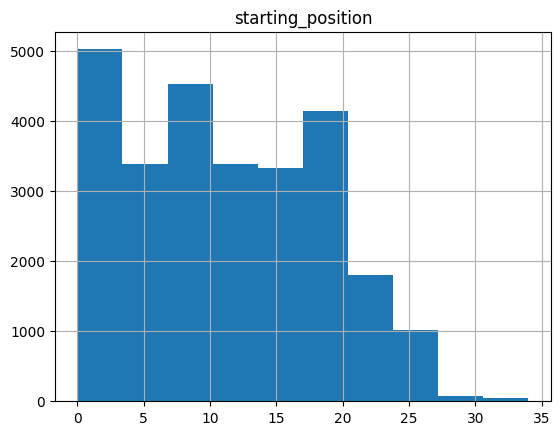

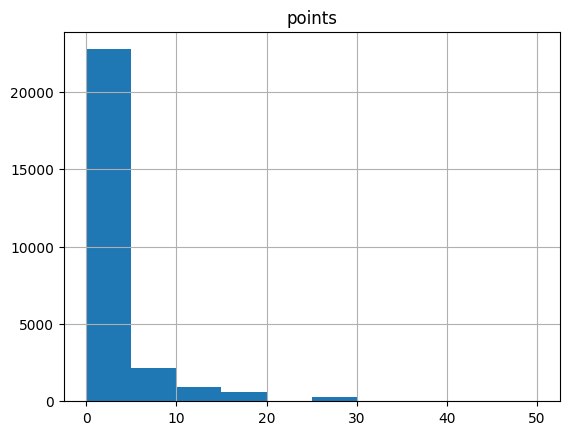

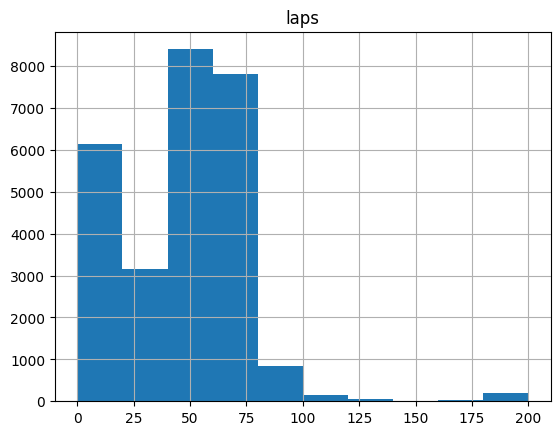

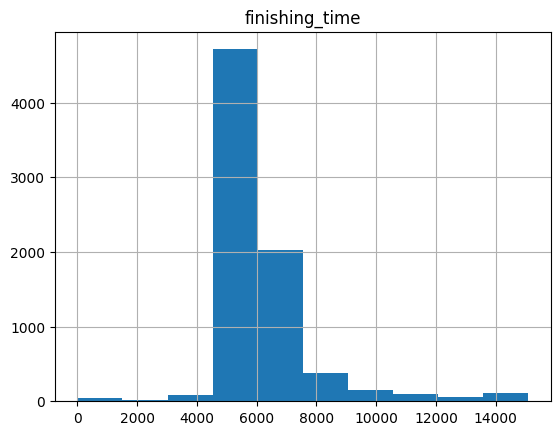

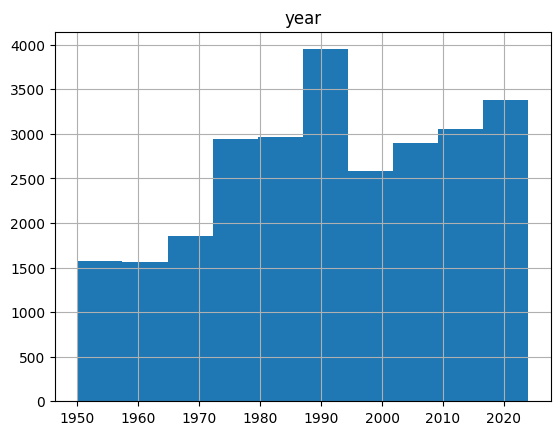

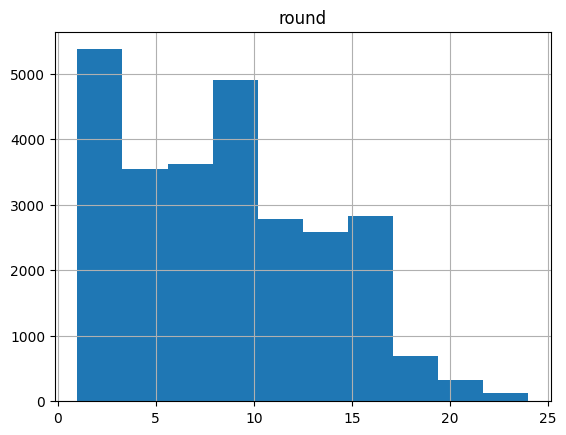

In [7]:
import matplotlib.pyplot as plt

num_columns = ["starting_position", "points", "laps", "finishing_time", "year", "round"]
obj_columns = ["final_position", "date", "circuit_name", "circuit_location", "circuit_country", "forename", "surname", "driver_nationality", "constructor_name", "constructor_nationality", "status", "dob"]

for column in num_columns:
    df[column].hist()
    plt.title(column)
    plt.show()

In [8]:
for col in num_columns:
  print(f'Feature {col}: median {df[col].median()}, IQR: [{df[col].quantile(0.25)},{df[col].quantile(0.75)}]')

for col in obj_columns:
  print(f'Feature {col}: mode {df[col].mode()[0]}')

Feature starting_position: median 11.0, IQR: [5.0,17.0]
Feature points: median 0.0, IQR: [0.0,2.0]
Feature laps: median 53.0, IQR: [23.0,66.0]
Feature finishing_time: median 5788.193499999999, IQR: [5378.4545,6402.676]
Feature year: median 1991.0, IQR: [1977.0,2009.0]
Feature round: median 8.0, IQR: [4.0,12.0]
Feature final_position: mode R
Feature date: mode 1954-05-31
Feature circuit_name: mode Autodromo Nazionale di Monza
Feature circuit_location: mode Monza
Feature circuit_country: mode Italy
Feature forename: mode Carlos
Feature surname: mode Schumacher
Feature driver_nationality: mode British
Feature constructor_name: mode Ferrari
Feature constructor_nationality: mode British
Feature status: mode Finished
Feature dob: mode 1981-07-29


In [19]:
df.head(5)

,resultId,raceId,driverId,constructorId,starting_position,final_position,points,laps,finishing_time,statusId,...,circuit_name,circuit_location,circuit_country,forename,surname,dob,driver_nationality,constructor_name,constructor_nationality,status
0,1,18,1,1,1,1,10.0,58,5690.616,1,...,Albert Park Grand Prix Circuit,Melbourne,Australia,Lewis,Hamilton,1985-01-07,British,McLaren,British,Finished
1,2,18,2,2,5,2,8.0,58,5696.094,1,...,Albert Park Grand Prix Circuit,Melbourne,Australia,Nick,Heidfeld,1977-05-10,German,BMW Sauber,German,Finished
2,3,18,3,3,7,3,6.0,58,5698.779,1,...,Albert Park Grand Prix Circuit,Melbourne,Australia,Nico,Rosberg,1985-06-27,German,Williams,British,Finished
3,4,18,4,4,11,4,5.0,58,5707.797,1,...,Albert Park Grand Prix Circuit,Melbourne,Australia,Fernando,Alonso,1981-07-29,Spanish,Renault,French,Finished
4,5,18,5,1,3,5,4.0,58,5708.630,1,...,Albert Park Grand Prix Circuit,Melbourne,Australia,Heikki,Kovalainen,1981-10-19,Finnish,McLaren,British,Finished


<Figure size 1500x500 with 0 Axes>

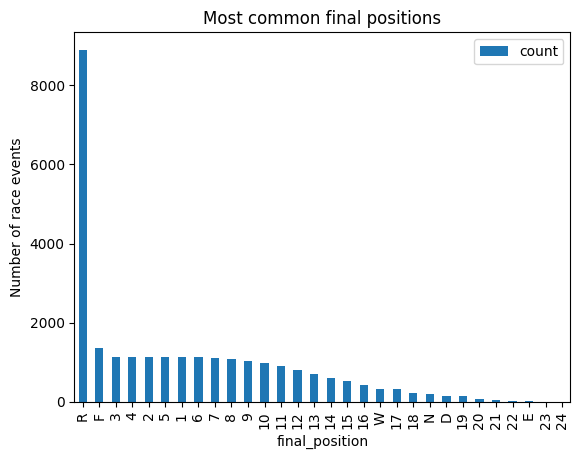

In [10]:
m = df["final_position"].value_counts().reset_index().head(30)
plt.figure(figsize=(15,5))
m.plot(kind='bar',x="final_position",y="count")
plt.ylabel("Number of race events")
plt.title("Most common final positions")
plt.show()

<Figure size 1500x500 with 0 Axes>

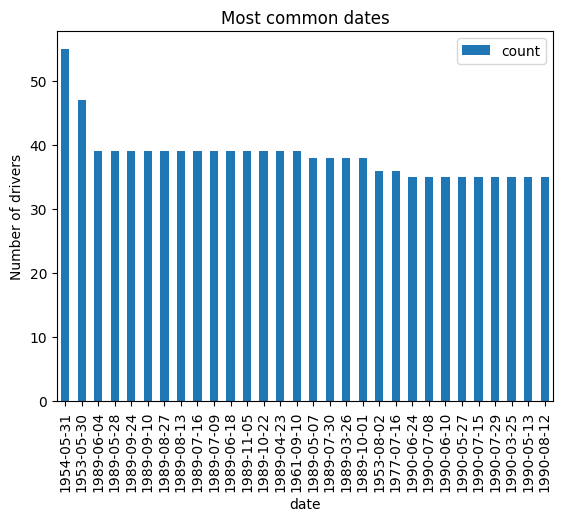

In [11]:
m = df["date"].value_counts().reset_index().head(30)
plt.figure(figsize=(15,5))
m.plot(kind='bar',x="date",y="count")
plt.ylabel("Number of drivers")
plt.title("Most common dates")
plt.show()

<Figure size 20000x2000 with 0 Axes>

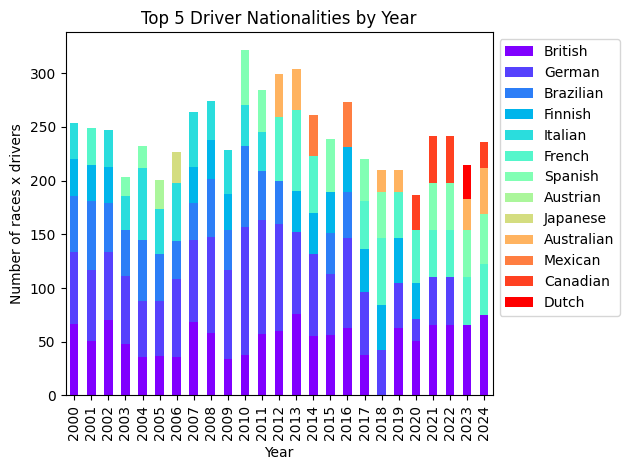

In [12]:
plt.figure(figsize=(200,20))

df_filtered=df.loc[df['year']>=2000]

grouped_data = df_filtered.groupby(["year", "driver_nationality"]).size().unstack(fill_value=0)

top5_per_year = grouped_data.apply(lambda row: row.nlargest(5).index.tolist(), axis=1)

top5_df = top5_per_year.apply(pd.Series)

grouped_data_top5 = pd.DataFrame()

for year in top5_df.index:
    top5_nationalities = top5_df.loc[year].tolist()
    year_data = grouped_data.loc[year, top5_nationalities]
    grouped_data_top5 = pd.concat([grouped_data_top5, year_data.to_frame().T], axis=0)

ax = grouped_data_top5.plot(kind="bar", stacked=True, colormap='rainbow')

plt.xlabel("Year")
plt.ylabel("Number of races x drivers")
plt.title("Top 5 Driver Nationalities by Year")

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

<Figure size 20000x2000 with 0 Axes>

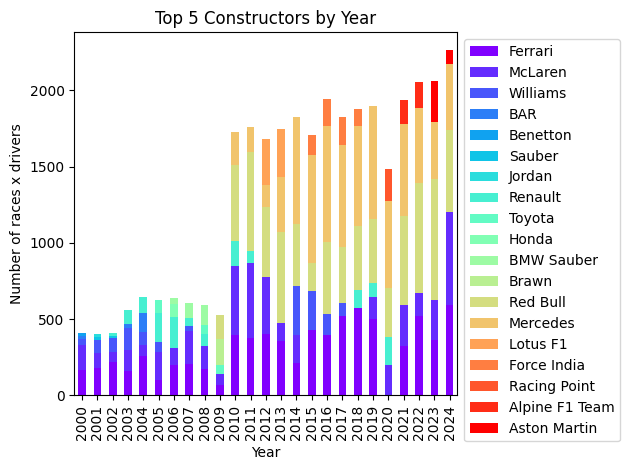

In [13]:
plt.figure(figsize=(200,20))

df_filtered=df.loc[df['year']>=2000]

grouped_data = df_filtered.groupby(["year", "constructor_name"])["points"].sum().unstack(fill_value=0)

top5_per_year = grouped_data.apply(lambda row: row.nlargest(5).index.tolist(), axis=1)

top5_df = top5_per_year.apply(pd.Series)

grouped_data_top5 = pd.DataFrame()

for year in top5_df.index:
    top5_constructors = top5_df.loc[year].tolist()
    year_data = grouped_data.loc[year, top5_constructors]
    grouped_data_top5 = pd.concat([grouped_data_top5, year_data.to_frame().T], axis=0)

ax = grouped_data_top5.plot(kind="bar", stacked=True, colormap='rainbow')

plt.xlabel("Year")
plt.ylabel("Number of races x drivers")
plt.title("Top 5 Constructors by Year")

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

---

Verranno visualizzati i boxplot per 46 costruttori che hanno almeno 20 risultati con punti > 0.
Costruttori inclusi: ['Ferrari', 'McLaren', 'Williams', 'Red Bull', 'Mercedes', 'Renault', 'Team Lotus', 'Benetton', 'Force India', 'Tyrrell', 'Sauber', 'Brabham', 'Toro Rosso', 'BRM', 'Ligier', 'Jordan', 'Alpine F1 Team', 'Alfa Romeo', 'Maserati', 'Cooper-Climax', 'Toyota', 'Aston Martin', 'BMW Sauber', 'Lotus F1', 'Haas F1 Team', 'Arrows', 'BAR', 'AlphaTauri', 'Lotus-Climax', 'March', 'Lotus-Ford', 'Racing Point', 'Honda', 'Kurtis Kraft', 'McLaren-Ford', 'Brabham-Repco', 'Brawn', 'Matra-Ford', 'Cooper-Maserati', 'Surtees', 'Matra', 'Brabham-Climax', 'Jaguar', 'Minardi', 'Shadow', 'Vanwall']


/var/folders/mz/2x3r_7v12sl_hfwrgd4nzpm00000gn/T/ipykernel_11718/3679995860.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='constructor_name', y='points', data=df_final_filtered, palette='viridis', order=sorted(frequent_constructors_positive)) # Aggiunto sorted per ordine alfabetico


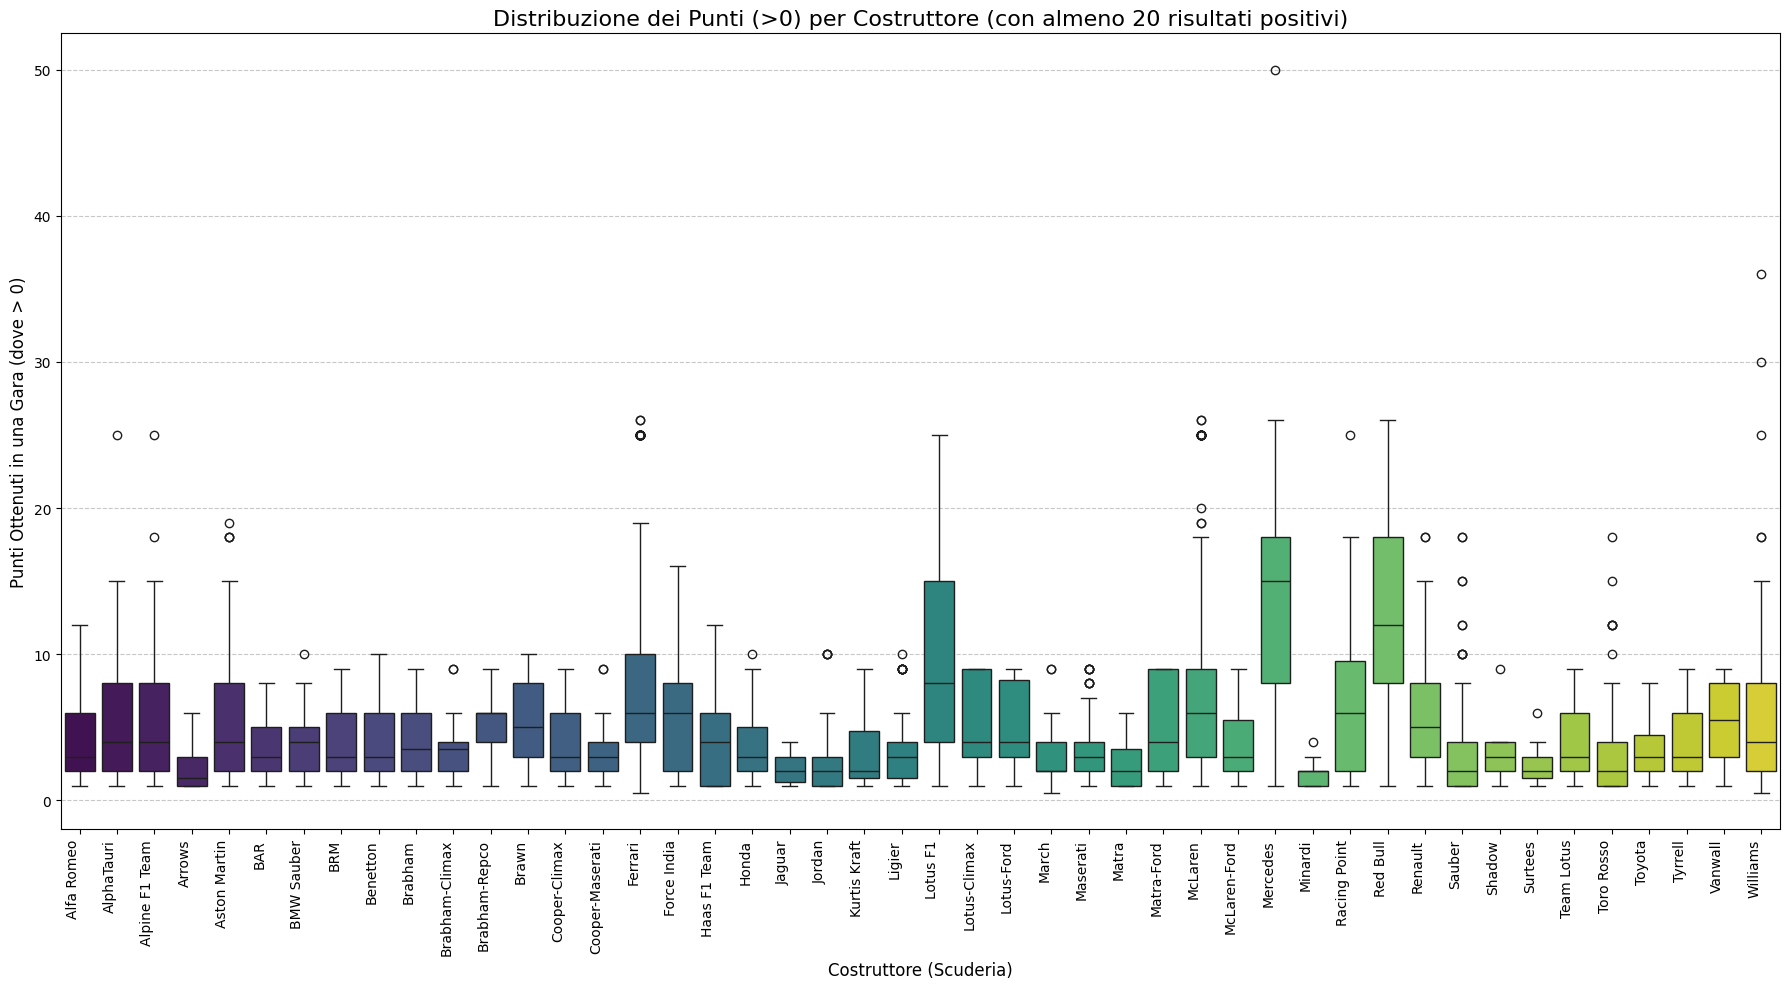

In [21]:
import seaborn as sns
import numpy as np # Necessario se si considera la trasformazione logaritmica

# Assicurati che il tuo DataFrame 'df' sia già stato caricato e preparato
# con le colonne 'constructor_name' e 'points'

# ----- 1. Preparazione dei Dati -----

# Definisci una soglia minima di risultati (con punti > 0) per costruttore
# Questo aiuta a rendere i boxplot più stabili e significativi.
# Potrebbe essere necessario aggiustare questo valore in base al tuo dataset.
min_positive_results_per_constructor = 20 # Ad esempio, almeno 20 volte il costruttore ha segnato punti

# Filtra prima per i risultati con punti positivi
df_points_positive_all = df[df['points'] > 0].copy() # .copy() per evitare SettingWithCopyWarning

# Ora, conta il numero di risultati con punti positivi per ciascun costruttore
constructor_positive_counts = df_points_positive_all['constructor_name'].value_counts()

# Identifica i costruttori che soddisfano la soglia minima di risultati positivi
frequent_constructors_positive = constructor_positive_counts[constructor_positive_counts >= min_positive_results_per_constructor].index.tolist()

# Filtra il DataFrame (già filtrato per punti > 0) per includere solo questi costruttori frequenti
df_final_filtered = df_points_positive_all[df_points_positive_all['constructor_name'].isin(frequent_constructors_positive)]

# Informa quanti costruttori verranno plottati
if not df_final_filtered.empty and frequent_constructors_positive:
    print(f"Verranno visualizzati i boxplot per {len(frequent_constructors_positive)} costruttori che hanno almeno {min_positive_results_per_constructor} risultati con punti > 0.")
    print(f"Costruttori inclusi: {frequent_constructors_positive}")
else:
    print(f"Nessun costruttore soddisfa il criterio di almeno {min_positive_results_per_constructor} risultati con punti > 0, oppure il DataFrame è vuoto dopo i filtri.")
    # Potresti voler interrompere lo script qui o gestire questo caso diversamente
    # exit() # Esempio per interrompere

# ----- 2. Creazione del Boxplot per i Punti Ottenuti (>0) -----

if not df_final_filtered.empty and frequent_constructors_positive:
    plt.figure(figsize=(18, 10)) # Imposta una dimensione più grande per una migliore leggibilità

    # Crea il boxplot
    # x: la variabile categorica (i costruttori)
    # y: la variabile numerica di cui vogliamo vedere la distribuzione (i punti)
    # data: il DataFrame filtrato
    # order: opzionale, per ordinare i boxplot. Potresti ordinare frequent_constructors_positive
    #        in base alla mediana dei punti se vuoi un ordine specifico.
    ax = sns.boxplot(x='constructor_name', y='points', data=df_final_filtered, palette='viridis', order=sorted(frequent_constructors_positive)) # Aggiunto sorted per ordine alfabetico

    # Migliora la leggibilità ruotando le etichette sull'asse X
    plt.xticks(rotation=90, ha='right') # ha='right' allinea meglio le etichette ruotate

    # Aggiungi titolo ed etichette
    plt.title(f'Distribuzione dei Punti (>0) per Costruttore (con almeno {min_positive_results_per_constructor} risultati positivi)', fontsize=16)
    plt.xlabel('Costruttore (Scuderia)', fontsize=12)
    plt.ylabel('Punti Ottenuti in una Gara (dove > 0)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Aggiunge una griglia orizzontale

    # Ottimizza il layout per evitare che le etichette vengano tagliate
    plt.tight_layout()

    # Mostra il grafico
    plt.show()
else:
    print("Skipping plot generation in quanto non ci sono dati sufficienti dopo il filtraggio.")


In [23]:
(df['starting_position'])

0         1
1         5
2         7
3        11
4         3
         ..
26754    14
26755    12
26756     9
26757    20
26758    10
Name: starting_position, Length: 26759, dtype: int64